## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import advanced_lane_line_helper_functions as aahlpf

In [2]:
# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

In [3]:
print(images)

['camera_cal\\calibration1.jpg', 'camera_cal\\calibration10.jpg', 'camera_cal\\calibration11.jpg', 'camera_cal\\calibration12.jpg', 'camera_cal\\calibration13.jpg', 'camera_cal\\calibration14.jpg', 'camera_cal\\calibration15.jpg', 'camera_cal\\calibration16.jpg', 'camera_cal\\calibration17.jpg', 'camera_cal\\calibration18.jpg', 'camera_cal\\calibration19.jpg', 'camera_cal\\calibration2.jpg', 'camera_cal\\calibration20.jpg', 'camera_cal\\calibration3.jpg', 'camera_cal\\calibration4.jpg', 'camera_cal\\calibration5.jpg', 'camera_cal\\calibration6.jpg', 'camera_cal\\calibration7.jpg', 'camera_cal\\calibration8.jpg', 'camera_cal\\calibration9.jpg']


(720, 1280, 3)


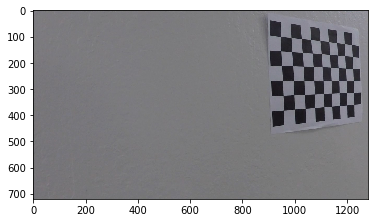

In [4]:
img = cv2.imread(images[7])
rgb_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
print(rgb_img.shape)
plt.imshow(rgb_img)

---
## Compute the camera calibration matrix and distortion coefficients given a set of chessboard images

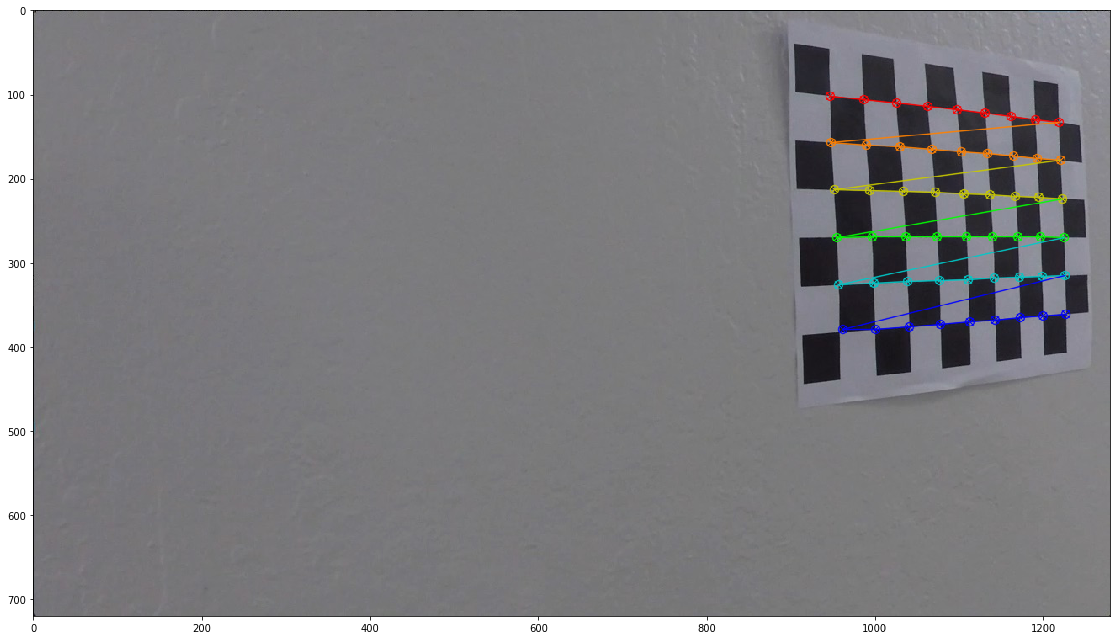

In [5]:
# prepare object points
nx = 9 # enter the number of inside corners in x
ny = 6 # enter the number of inside corners in y

# Make a list of calibration images
img = cv2.imread(images[7])

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

# If found, draw corners
if ret == True:
    # Draw and display the corners
    cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # plt.imshow(img)
    
    fig, ax = plt.subplots(figsize=(16, 9))
    ax.imshow(rgb_img)
    plt.tight_layout()

In [6]:
# fig.savefig('output_images/calibration_find_corners.jpg')

In [7]:
'''
save_img = cv2.imread('output_images/calibration_find_corners.jpg')
f, ax = plt.subplots(1, 1, figsize=(24, 9))
f.tight_layout()
ax.imshow(cv2.cvtColor(save_img,cv2.COLOR_BGR2RGB))
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
'''

"\nsave_img = cv2.imread('output_images/calibration_find_corners.jpg')\nf, ax = plt.subplots(1, 1, figsize=(24, 9))\nf.tight_layout()\nax.imshow(cv2.cvtColor(save_img,cv2.COLOR_BGR2RGB))\nplt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)\n"

In [8]:
imgpoints, objpoints = aahlpf.find_cal_pts(images, nx=9, ny=6)

In [9]:
# Read in each image
img = cv2.imread(images[7])

# Convert image to grayscale
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints,
                                                   gray.shape[::-1], None, None)

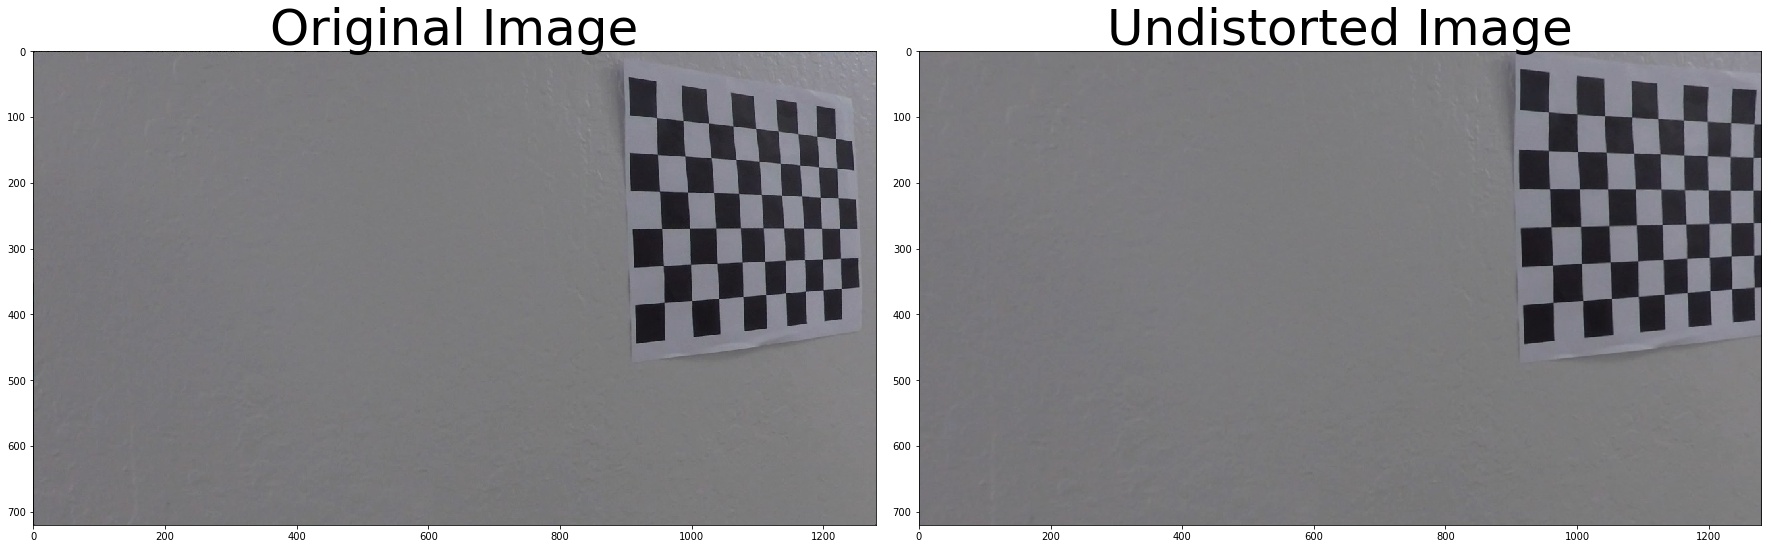

In [10]:
# Read in each image
img = cv2.imread(images[7])

undist = cv2.undistort(img, mtx, dist, None, mtx)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(cv2.cvtColor(undist,cv2.COLOR_BGR2RGB))
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [11]:
# f.savefig('output_images/calibration_distort_correct.jpg')

In [12]:
'''
save_img = cv2.imread('output_images/calibration_distort_correct.jpg')
f, ax = plt.subplots(1, 1, figsize=(24, 9))
f.tight_layout()
ax.imshow(cv2.cvtColor(save_img,cv2.COLOR_BGR2RGB))
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
'''

"\nsave_img = cv2.imread('output_images/calibration_distort_correct.jpg')\nf, ax = plt.subplots(1, 1, figsize=(24, 9))\nf.tight_layout()\nax.imshow(cv2.cvtColor(save_img,cv2.COLOR_BGR2RGB))\nplt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)\n"

---
## Apply a distortion correction to raw images

In [13]:
# Make a list of calibration images
lane_images = glob.glob('test_images/*.jpg')

In [14]:
print(len(lane_images))
print(lane_images)

8
['test_images\\straight_lines1.jpg', 'test_images\\straight_lines2.jpg', 'test_images\\test1.jpg', 'test_images\\test2.jpg', 'test_images\\test3.jpg', 'test_images\\test4.jpg', 'test_images\\test5.jpg', 'test_images\\test6.jpg']


In [15]:
im_num = 4
lane_image = mpimg.imread(lane_images[im_num])
print(lane_images[im_num])
print(lane_image.shape)
# plt.imshow(lane_image)

test_images\test3.jpg
(720, 1280, 3)


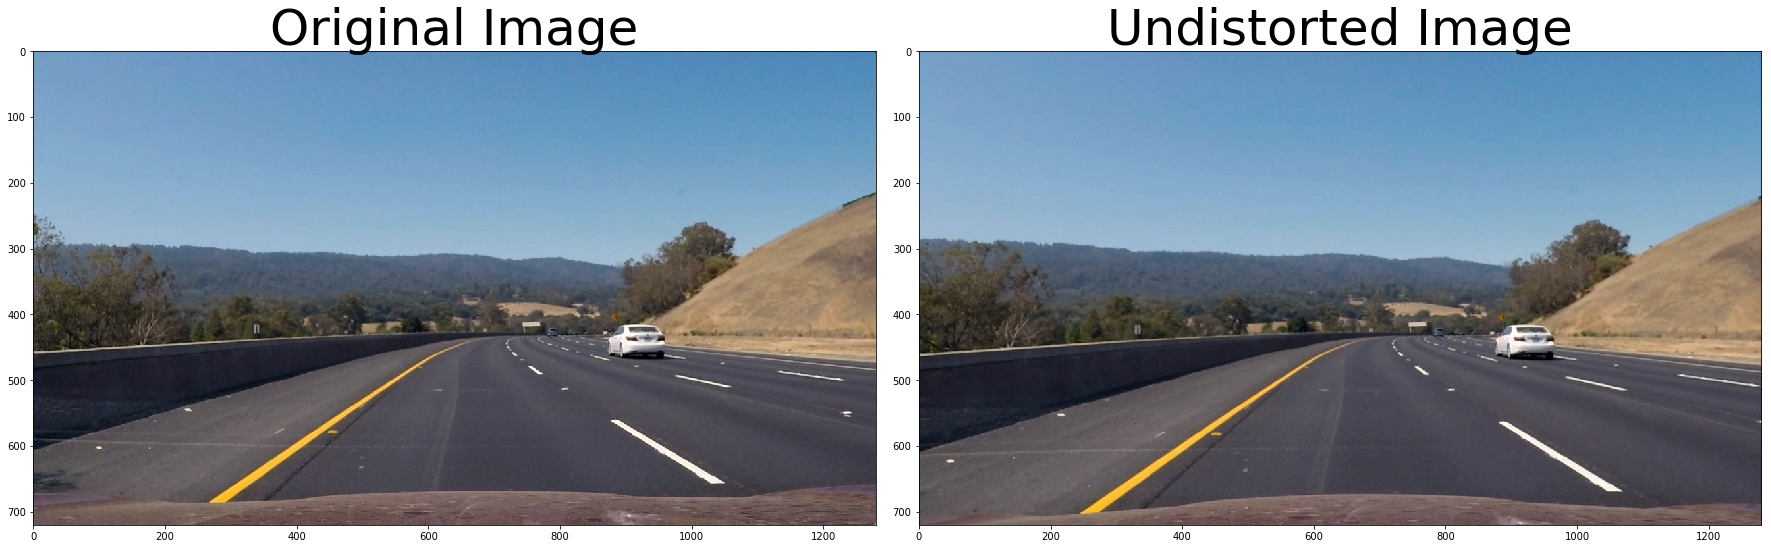

In [16]:
lane_undist = cv2.undistort(lane_image, mtx, dist, None, mtx)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(lane_image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(lane_undist)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [17]:
# f.savefig('output_images/test5_distort_correct.jpg')

---
## Use color transforms, gradients, etc., to create a thresholded binary image

In [18]:
result = aahlpf.pipeline(lane_undist)

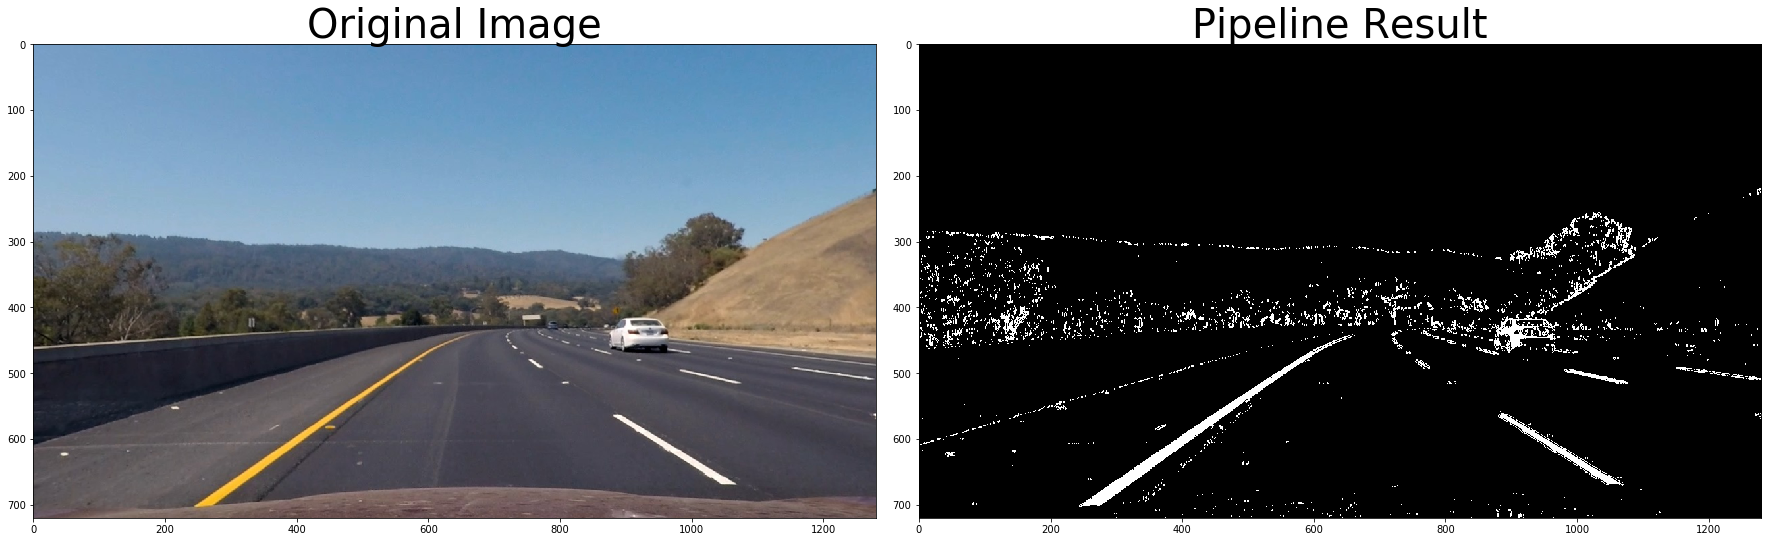

In [19]:
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()

ax1.imshow(lane_undist)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(result, cmap='gray')
ax2.set_title('Pipeline Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

In [20]:
# f.savefig('output_images/test5_binary.jpg')

In [21]:
img = lane_undist
ksize = 3
sobelx_thresh = (20, 100)

gradx = aahlpf.abs_sobel_thresh(img, orient='x', sobel_kernel=ksize, thresh=sobelx_thresh)

combined = np.zeros_like(gradx)
combined[(gradx == 1)] = 1

'''
f, ax1 = plt.subplots(1, 1, figsize=(24, 9))
f.tight_layout()
ax1.imshow(gradx, cmap='gray')
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
'''

"\nf, ax1 = plt.subplots(1, 1, figsize=(24, 9))\nf.tight_layout()\nax1.imshow(gradx, cmap='gray')\nplt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)\n"

In [22]:
img = lane_undist
s_thresh = (215, 240)

hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
s_channel = hls[:,:,2]

s_binary = np.zeros_like(s_channel)
s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1

'''
f, ax1 = plt.subplots(1, 1, figsize=(24, 9))
f.tight_layout()
ax1.imshow(s_binary, cmap='gray')
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
'''

"\nf, ax1 = plt.subplots(1, 1, figsize=(24, 9))\nf.tight_layout()\nax1.imshow(s_binary, cmap='gray')\nplt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)\n"

In [23]:
img = lane_undist
r_thresh = (225, 255)

r = img[:,:,0]

r_binary = np.zeros_like(r)
r_binary[(r > r_thresh[0]) & (r <= r_thresh[1])] = 1

'''
f, ax1 = plt.subplots(1, 1, figsize=(24, 9))
f.tight_layout()
ax1.imshow(r_binary, cmap='gray')
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
'''

"\nf, ax1 = plt.subplots(1, 1, figsize=(24, 9))\nf.tight_layout()\nax1.imshow(r_binary, cmap='gray')\nplt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)\n"

In [24]:
combined = np.zeros_like(gradx)
combined[(gradx == 1)] = 1

color_combined = np.zeros_like(s_binary)
color_combined[(s_binary == 1) | (r_binary == 1)] = 1

color_binary = np.zeros_like(combined)
color_binary[(combined == 1) | (color_combined == 1)] = 1

'''
f, ax1 = plt.subplots(1, 1, figsize=(24, 9))
f.tight_layout()
ax1.imshow(color_binary, cmap='gray')
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
'''

"\nf, ax1 = plt.subplots(1, 1, figsize=(24, 9))\nf.tight_layout()\nax1.imshow(color_binary, cmap='gray')\nplt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)\n"